##### 问题描述

大家好，我们在用 networkx 显示中文的时候，会发现不能显示中文。 

##### 解决办法

1. 下载Github仓库中的字体SimHei.ttf； 
2. 在 jupyter notebook 中执行
```python
import matplotlib
print(matplotlib.__path__)
```
找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

```bash
$ mv SimHei.ttf DejaVuSans.ttf
```

其中，用到的 ttf 字体。 我给大家传到附件上了。 

Previous Course

1. What's the language model? OOV problem? 
2. Syntax Tree. lambda 

$$ pr(w) $$

## Out of Vocabulary(OOV)

Pr(w_o) = constant < Pr(w_1)

## Language Model: Smooth

In [1]:
import random

In [5]:
"""adj* => adj* adj | adj null"""

def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

def adj_star_2():
     return random.choice([lambda : '', lambda : adj() + adj_star_2()])()

def adj_star():
    return random.choice(['', ajd() + adj_star()])

In [ ]:
lambda : adj() + adj_star_2()

In [31]:
numbers = [1, -2, -4, 1, 5, 6, 9, -11]

In [36]:
def absolute(number): 
    if number < 0: return -1 * number
    else:
        return number

In [34]:
absolute(-11)

11

In [38]:
mod_5(6)

1

In [39]:
mod_5(7)

2

In [41]:
def mod_5(number): 
    return number % 5

sorted(numbers, key=lambda x: x % 5)

[5, 1, -4, 1, 6, -2, 9, -11]

In [42]:
mod_5_lambda = lambda x: x % 5

In [43]:
mod_5

<function __main__.mod_5(number)>

In [45]:
mod_5_lambda(19)

4

In [46]:
mod_5(19)

4

In [30]:
adj_star_2()

'蓝色的'

## Search Policy

In [48]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [54]:
city_location = {
    '香港': (114.17, 22.28)
}

Input: String -> dict

In [55]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [56]:
import re

In [86]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [93]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [94]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [89]:
import math

In [90]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [91]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [95]:
get_geo_distance('上海', '杭州')

153.5185697155768

In [96]:
import networkx as nx

In [114]:
city_graph = nx.Graph()

In [115]:
city_graph.add_nodes_from(list(city_location.keys()))

In [106]:
%matplotlib inline

In [109]:
import matplotlib.pyplot as plt

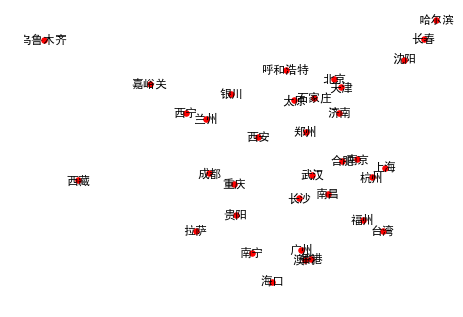

In [120]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [205]:
threshold = 300

In [208]:
city_connection = defaultdict(list)

In [211]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [212]:
city_connection

defaultdict(list,
            {'香港': ['广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门',
              '广州',
              '长沙',
              '澳门'],
             '广州': ['香港',
              '香港',
              '长沙',
              '澳门',
              '长沙',
              '澳门',
              '香港',
              '香港',
              '长沙',
              '澳门',
              '长沙',
              '澳门'],
             '长沙': ['香港',
              '武汉',
              '郑州',
              '广州',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '澳门',
              '澳门',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '澳门',
              '澳门'],
             '澳门': ['香港',
              '广州',
              '长沙',
              '

In [213]:
city_with_road = nx.Graph(city_connection)

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


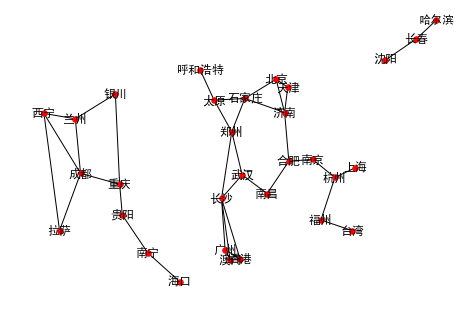

In [214]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [ ]:
g

In [147]:
from collections import defaultdict

In [148]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [149]:
simple_connection_info = defaultdict(list)

In [150]:
simple_connection_info.update(simple_connection_info_src)

In [198]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [202]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [203]:
bfs(number_grpah, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [201]:
simple_connection_info['西安']

['兰州', '长沙']

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


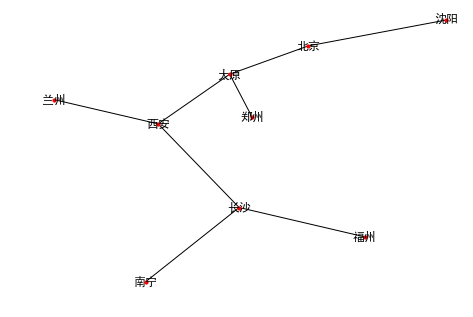

In [128]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

In [253]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [243]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [250]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [246]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [237]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [142]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [204]:
pretty_print(search('北京', '福州', simple_connection_info))

北京🚗->太原🚗->西安🚗->长沙🚗->福州


## Breath first search

## Depth first search

In [216]:
pretty_print(search('北京', '南京', city_connection))

北京🚗->济南🚗->合肥🚗->南京


In [217]:
pretty_print(search('北京', '长沙', city_connection))

北京🚗->石家庄🚗->郑州🚗->长沙


In [249]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_stations_first))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州


In [251]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_possible))

北京🚗->石家庄🚗->郑州🚗->武汉🚗->长沙🚗->广州


## Assignment

1. 网络爬虫 + 正则
2. 数据处理
3. 算法的应用能力

In [254]:
import requests

In [255]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [257]:
response = requests.get(url)

In [270]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [271]:
pattern = re.compile(what_we_want)

In [272]:
likes = pattern.findall(response.text)

In [273]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/25828589/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page


## Machine Learning

In [4]:
from sklearn.datasets import load_boston

In [5]:
data = load_boston()

In [6]:
X, y = data['data'], data['target']

In [7]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [8]:
y[1]

21.6

In [9]:
len(X[:, 0])

506

In [10]:
len(y)

506

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [13]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

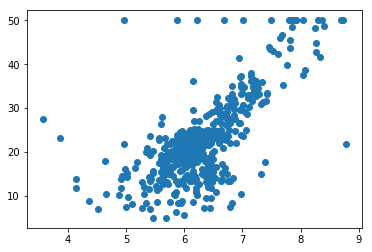

In [14]:
draw_rm_and_price()

In [15]:
import random

In [16]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

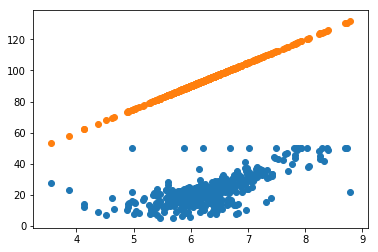

In [17]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

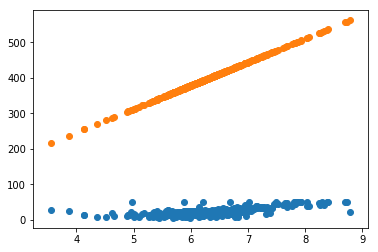

In [18]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

$$ \hat{y} $$

In [19]:
list(y)

[24.0,
 21.6,
 34.7,
 33.4,
 36.2,
 28.7,
 22.9,
 27.1,
 16.5,
 18.9,
 15.0,
 18.9,
 21.7,
 20.4,
 18.2,
 19.9,
 23.1,
 17.5,
 20.2,
 18.2,
 13.6,
 19.6,
 15.2,
 14.5,
 15.6,
 13.9,
 16.6,
 14.8,
 18.4,
 21.0,
 12.7,
 14.5,
 13.2,
 13.1,
 13.5,
 18.9,
 20.0,
 21.0,
 24.7,
 30.8,
 34.9,
 26.6,
 25.3,
 24.7,
 21.2,
 19.3,
 20.0,
 16.6,
 14.4,
 19.4,
 19.7,
 20.5,
 25.0,
 23.4,
 18.9,
 35.4,
 24.7,
 31.6,
 23.3,
 19.6,
 18.7,
 16.0,
 22.2,
 25.0,
 33.0,
 23.5,
 19.4,
 22.0,
 17.4,
 20.9,
 24.2,
 21.7,
 22.8,
 23.4,
 24.1,
 21.4,
 20.0,
 20.8,
 21.2,
 20.3,
 28.0,
 23.9,
 24.8,
 22.9,
 23.9,
 26.6,
 22.5,
 22.2,
 23.6,
 28.7,
 22.6,
 22.0,
 22.9,
 25.0,
 20.6,
 28.4,
 21.4,
 38.7,
 43.8,
 33.2,
 27.5,
 26.5,
 18.6,
 19.3,
 20.1,
 19.5,
 19.5,
 20.4,
 19.8,
 19.4,
 21.7,
 22.8,
 18.8,
 18.7,
 18.5,
 18.3,
 21.2,
 19.2,
 20.4,
 19.3,
 22.0,
 20.3,
 20.5,
 17.3,
 18.8,
 21.4,
 15.7,
 16.2,
 18.0,
 14.3,
 19.2,
 19.6,
 23.0,
 18.4,
 15.6,
 18.1,
 17.4,
 17.1,
 13.3,
 17.8,
 14.0,
 14.4,
 13.4,

In [20]:
price_by_random_k_and_b

[415.95,
 405.786,
 456.21,
 443.868,
 453.702,
 406.38,
 378.792,
 389.352,
 353.646,
 378.26399999999995,
 402.882,
 378.59400000000005,
 370.67400000000004,
 374.634,
 384.336,
 367.044,
 373.71,
 377.34000000000003,
 342.096,
 359.982,
 349.62,
 375.69,
 387.372,
 365.65799999999996,
 372.98400000000004,
 351.534,
 365.65799999999996,
 381.102,
 410.67,
 422.48400000000004,
 359.058,
 382.752,
 374.7,
 358.26599999999996,
 384.336,
 373.578,
 367.50600000000003,
 368.09999999999997,
 375.75600000000003,
 417.27,
 445.584,
 428.82,
 389.154,
 391.92600000000004,
 382.554,
 357.012,
 363.876,
 379.98,
 338.334,
 351.732,
 375.558,
 385.59000000000003,
 411.726,
 377.868,
 370.608,
 460.43399999999997,
 403.278,
 431.856,
 387.57,
 373.18199999999996,
 360.90599999999995,
 375.75600000000003,
 408.096,
 428.292,
 450.86400000000003,
 397.14,
 363.942,
 369.948,
 351.204,
 370.40999999999997,
 405.522,
 375.42600000000004,
 382.29,
 394.17,
 396.018,
 396.876,
 396.414,
 387.2399999999

In [21]:
[1, 1, 1]
[2, 2, 2]

[2, 2, 2]

## loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [22]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [23]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 26.5453043876702 best_b: -13.99967720291184, and the loss is: 17170.310353396453
When time is : 3, get best_k: 3.249915688266711 best_b: 47.274680165071004, and the loss is: 2100.478666183567
When time is : 11, get best_k: 13.780101084146807 best_b: -24.11114008173412, and the loss is: 1651.100245130773
When time is : 36, get best_k: 10.923589264978602 best_b: -82.2072536958205, and the loss is: 1347.6724459101629
When time is : 59, get best_k: -6.150928454754606 best_b: 86.36579059287848, and the loss is: 792.0922255224583
When time is : 87, get best_k: -8.801793312213604 best_b: 67.61502619644949, and the loss is: 306.26520288564944
When time is : 89, get best_k: 6.97915438328593 best_b: -32.62172830363896, and the loss is: 173.3552277924049
When time is : 122, get best_k: 16.504967240453254 best_b: -71.24638717147478, and the loss is: 169.57386481706558
When time is : 163, get best_k: 11.25517393650577 best_b: -54.22136579860965, and the loss is: 82.119

In [24]:
10 ** 0.5

3.1622776601683795

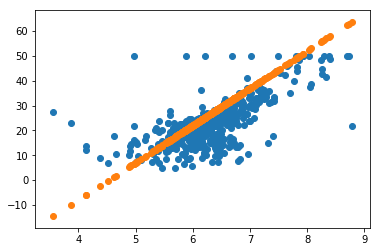

In [25]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 2nd-Method: Direction Adjusting

In [31]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

-48.47998173163661 14.56585047847814
When time is : 9, get best_k: -47.4799817316366 best_b: 15.565850478478136, and the loss is: 94866.49293018472
When time is : 19, get best_k: -46.479981731636585 best_b: 16.565850478478144, and the loss is: 90415.40548557085
When time is : 29, get best_k: -45.47998173163657 best_b: 17.565850478478158, and the loss is: 86071.43522770402
When time is : 39, get best_k: -44.479981731636556 best_b: 18.565850478478172, and the loss is: 81834.58215658426
When time is : 49, get best_k: -43.47998173163654 best_b: 19.565850478478186, and the loss is: 77704.8462722116
When time is : 59, get best_k: -42.47998173163653 best_b: 20.5658504784782, and the loss is: 73682.227574586
When time is : 69, get best_k: -41.479981731636514 best_b: 21.565850478478215, and the loss is: 69766.72606370725
When time is : 79, get best_k: -40.4799817316365 best_b: 22.56585047847823, and the loss is: 65958.34173957566
When time is : 89, get best_k: -39.479981731636485 best_b: 23.565

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

## 导数

In [27]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [29]:
trying_times = 2000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k,best_b=current_k,current_b
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, \
            and the loss is: {}'.\
                  format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -30.299956815648073 best_b: 78.10060907800798, and the loss is: 18994.755640780735
When time is : 50, get best_k: -23.16308370713623 best_b: 79.2082586114323, and the loss is: 8459.02679028321
When time is : 100, get best_k: -18.43287277847901 best_b: 79.93757036880731, and the loss is: 3832.278507422803
When time is : 150, get best_k: -15.297511511287853 best_b: 80.41616539345246, and the loss is: 1800.4369337986898
When time is : 200, get best_k: -13.219027082134795 best_b: 80.72861574035782, and the loss is: 908.1389363284729
When time is : 250, get best_k: -11.840915061494083 best_b: 80.93096571300404, and the loss is: 516.2672413374294
When time is : 300, get best_k: -10.92692669712659 best_b: 81.06035481274377, and the loss is: 344.1558897770017
When time is : 350, get best_k: -10.320504402889325 best_b: 81.1413946856099, and the loss is: 268.55147603012546
When time is : 400, get best_k: -9.917900423302243 best_b: 81.19039500452604, and the loss is:

In [65]:
y = 10

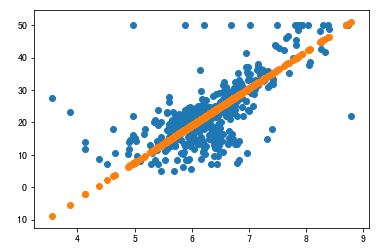

In [68]:
X_rm = X[:, 5]
k = 11.431551629413757
b = -49.52403584539048
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## Breaking: 10:03 PM Continue :)

In [357]:
loss([1, 1, 1], [2, 2, 3])

2.0

In [69]:
import time

In [71]:
for i in range(100):
    print('R U ready?')
    time.sleep(1)

R U ready?
R U ready?
R U ready?
R U ready?
R U ready?
R U ready?
R U ready?
R U ready?
R U ready?
R U ready?
R U ready?


KeyboardInterrupt: 

In [358]:
loss([1, 1, 1], [1, 1, 1])

0.0

In [289]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [284]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000